***Manipulación y muestra de gaficos***

In [17]:
import sys
!{sys.executable} -m pip install --quiet matplotlib seaborn numpy

from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Traemos nuestro df
df_maestro = pd.read_csv(df)

df_maestro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id_producto      343 non-null    int64 
 1   nombre_producto  343 non-null    object
 2   cantidad         343 non-null    int64 
 3   precio_unitario  343 non-null    int64 
 4   importe          343 non-null    int64 
 5   fecha            343 non-null    object
 6   email            343 non-null    object
 7   medio_pago       343 non-null    object
 8   anio             343 non-null    int64 
 9   mes              343 non-null    int64 
 10  trimestre        343 non-null    int64 
 11  nombre_mes       343 non-null    object
 12  ciudad           343 non-null    object
 13  fecha_alta       343 non-null    object
 14  categoria        343 non-null    object
 15  dias_desde_alta  343 non-null    int64 
dtypes: int64(8), object(8)
memory usage: 43.0+ KB



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Goddess\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [44]:
# Identificación de columnas con variables numericas

columnas_numericas = df_maestro.select_dtypes(include=[np.number])

columnas_numericas.head()


,id_producto,cantidad,precio_unitario,importe,anio,mes,trimestre,dias_desde_alta
0,90,1,2902,2902,2024,6,2,474
1,82,5,2394,11970,2024,3,1,393
2,39,5,469,2345,2024,3,1,393
3,70,2,4061,8122,2024,3,1,393
4,22,1,2069,2069,2024,3,1,393


In [ ]:
# corregimos los valores NaN de anio para hacer la matrix

col_num_sinanio = columnas_numericas.drop(columns=['anio'], errors='ignore')

col_num_sinanio.head()


,id_producto,cantidad,precio_unitario,importe,mes,trimestre,dias_desde_alta
0,90,1,2902,2902,6,2,474
1,82,5,2394,11970,3,1,393
2,39,5,469,2345,3,1,393
3,70,2,4061,8122,3,1,393
4,22,1,2069,2069,3,1,393


In [41]:
# Calculo de Matriz de Correlaciones
correlation_matrix = col_num_sinanio.corr()

# Mostrar la matriz de correlaciones
correlation_matrix.head()

,id_producto,cantidad,precio_unitario,importe,mes,trimestre,dias_desde_alta
id_producto,1.000000,0.076373,0.002185,0.048966,-0.076665,-0.083655,-0.084818
cantidad,0.076373,1.000000,-0.074483,0.599723,0.015431,0.001085,0.007750
precio_unitario,0.002185,-0.074483,1.000000,0.679298,0.056883,0.035973,0.079356
importe,0.048966,0.599723,0.679298,1.000000,0.072226,0.056388,0.079085
mes,-0.076665,0.015431,0.056883,0.072226,1.000000,0.899573,0.855597


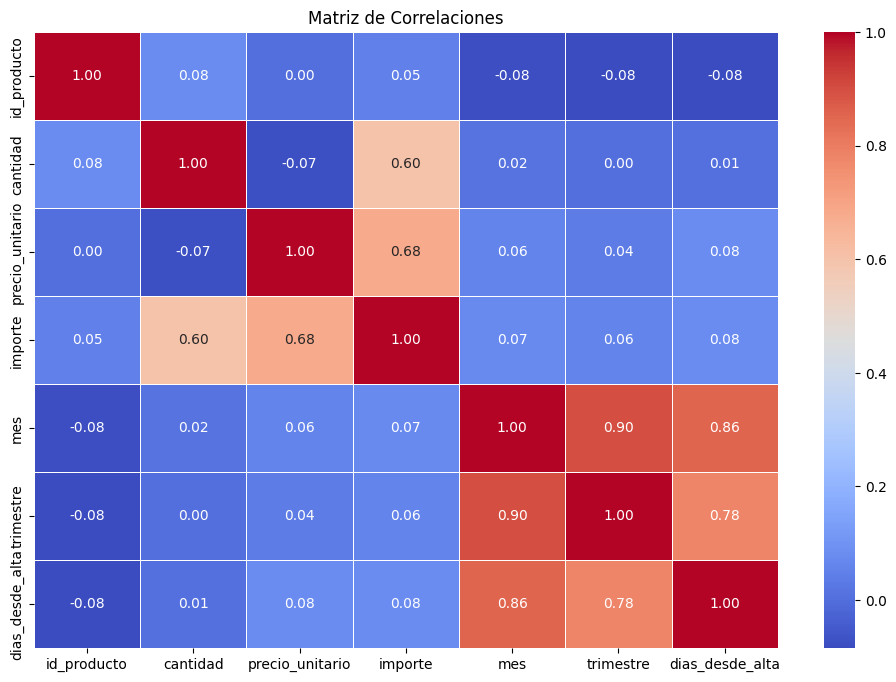

La Matriz de Correlaciones solo con variables numericas.


In [43]:
# Creamos el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlaciones')
plt.show()

print(f"La Matriz de Correlaciones solo con variables numericas.")